<a href="https://colab.research.google.com/github/manato23/spotifyAPI/blob/main/spotifyAPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install spotipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 246 kB 6.4 MB/s 
     |████████████████████████████████| 62 kB 1.4 MB/s 
     |████████████████████████████████| 139 kB 45.2 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.1 which is incompatible.


In [ ]:
!pip install torchviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4150 sha256=6d965402a14eb9c74d017edf942f14442da40a92727e91201528444239e340b8
  Stored in directory: /root/.cache/pip/wheels/04/38/f5/dc4f85c3909051823df49901e72015d2d750bd26b086480ec2
Successfully built torchviz


In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
# import sys
# import pprint
import time
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [ ]:
client_id = '956372821300403d8591b095b1a29b86'
client_secret = '3b152dc696954e68b828fc3732b57b06'
client_credentials_manager = spotipy.oauth2.SpotifyClientCredentials(client_id, client_secret)

sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [ ]:
def getTrackIDs(user, playlist_id):
    ids = []
    playlist = sp.user_playlist(user, playlist_id)
    for item in playlist['tracks']['items']:
        track = item['track']
        ids.append(track['id'])
    return ids

ids_1 = getTrackIDs('whb13iftjn2y8x49ua6bbntyc', '7Gk8TEohWRopx0jsBnZ1qn')

In [ ]:
print(len(ids_1))
print(ids_1)

50
['4NaaF28BeO9WzjDrSS71Nz', '2wRKOmpe6I7q6k69bkjuFU', '0zfNtgPJ5FLkbveRjSdCMb', '5rJ7bdPmr8nfmm2JQ8xHOz', '5GXYKnnzBlHvrzBQ5WoxME', '2WTHLEVjfefbGoW7F3dXIg', '4OelNEcxPGoCOU29fchcsv', '4q64nWPqTWIVHGHidRaSUm', '0mBP9X2gPCuapvpZ7TGDk3', '1ndUYRPchJVNQCM7XwN7Hq', '60ReNXcPcsVFd7nUuQw5HZ', '0ir7DGXo3hxaPa82h1vrOj', '4IfrM44LofE9bSs6TDZS49', '1ihCiJaXRl4f6Sy4LJov5z', '5W7Y92LB4jWvu9NeEQ0GZl', '1Vqs0lXeJafYZz2sxnfB3V', '007tbArpeenE3cbJU5I3PL', '1B04DTxiZUA5QW9Zxe1IEJ', '5m1i6hq7dmRlp3c1utE48L', '5jFKVJxMWo7ieMI6TZFkCO', '16GmwXr8eice4keZxd1iov', '2uMNMcjjUz8oNIxjIu20qE', '6IO5nn84TKArsi3cjpIqaD', '4JK1kDUdH9RTBQrrSO1QfR', '6PRy17C5LiiN7VCLS6IA98', '51oc6MEsXTpnPn6GOw5VuP', '1zd35Y44Blc1CwwVbW3Qnk', '1VHL1PIkhDwWbFc65xHwOr', '2IL2asrtx7XM1y8fu2RMnR', '6qn31XzTa6YKXs5FZpAPgP', '3PK5ERLCyMuQ5Cb89GbZVL', '4jVHvArqYm2nDCUNq2OOAK', '79vEv8zqy9tLYsTxxkXHXq', '5PjdY0CKGZdEuoNab3yDmX', '0XZyF9lv6diMt4bxThOL0h', '6tkSMR8bEIfEcJn7ybJtSP', '296nXCOv97WJNRWzIBQnoj', '5QW06boBm4TZ6VhPTQXSSk', '3XYRV7Z

In [ ]:
def getTrackFeatures(id):
    meta = sp.track(id)
    features = sp.audio_features(id)

    # meta
    name = meta['name']
    album = meta['album']['name']
    artist = meta['album']['artists'][0]['name']
    release_date = meta['album']['release_date']
    length = meta['duration_ms']
    popularity = meta['popularity']
    # features
    acousticness = features[0]['acousticness']
    danceability = features[0]['danceability']
    energy = features[0]['energy']
    instrumentalness = features[0]['instrumentalness']
    mode = features[0]['mode']
    liveness = features[0]['liveness']
    loudness = features[0]['loudness']
    speechiness = features[0]['speechiness']
    tempo = features[0]['tempo']
    time_signature = features[0]['time_signature']
    valence = features[0]['valence']

    track = [name, album, artist, release_date, length, mode, popularity, danceability, acousticness, energy, instrumentalness, liveness, loudness, speechiness, tempo, time_signature, valence]
    return track

In [ ]:
# loop over track ids
tracks = []
for i in range(len(ids_1)):
    time.sleep(.5)
    track = getTrackFeatures(ids_1[i])
    tracks.append(track)

# create dataset
df_1 = pd.DataFrame(tracks, columns = ['name', 'album', 'artist', 'release_date', 'length', 'mode', 'popularity', 'danceability', 'acousticness', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'time_signature', 'valence'])

df_1.head()

,name,album,artist,release_date,length,mode,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,valence
0,ダンスホール,ダンスホール,Mrs. GREEN APPLE,2022-05-23,203149,1,74,0.736,0.020900,0.695,0.000000,0.0517,-3.870,0.0468,109.976,4,0.784
1,エジソン,ネオン,WEDNESDAY CAMPANELLA,2022-05-25,193510,0,71,0.838,0.019500,0.729,0.008900,0.1010,-5.733,0.0802,129.999,4,0.619
2,バニラ,バニラ,Kyanai,2022-03-09,251050,1,71,0.641,0.028000,0.698,0.000000,0.1300,-3.934,0.0307,113.041,4,0.521
3,POP!,IM NAYEON,NAYEON,2022-06-24,168106,1,73,0.793,0.035600,0.859,0.000000,0.0343,-2.998,0.0544,97.001,4,0.392
4,逆光 - ウタ from ONE PIECE FILM RED,逆光 (ウタ from ONE PIECE FILM RED),Ado,2022-07-05,237862,0,68,0.563,0.000382,0.901,0.000005,0.3880,-3.926,0.1100,145.004,4,0.684


In [ ]:
df_1['n']

,name,album,artist,release_date,length,mode,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,valence
0,ダンスホール,ダンスホール,Mrs. GREEN APPLE,2022-05-23,203149,1,73,0.736,0.0209,0.695,0.0000,0.0517,-3.870,0.0468,109.976,4,0.784
1,エジソン,ネオン,WEDNESDAY CAMPANELLA,2022-05-25,193510,0,70,0.838,0.0195,0.729,0.0089,0.1010,-5.733,0.0802,129.999,4,0.619
2,バニラ,バニラ,Kyanai,2022-03-09,251050,1,71,0.641,0.0280,0.698,0.0000,0.1300,-3.934,0.0307,113.041,4,0.521


In [ ]:
df_1_1 = df_1.drop(columns=['name', 'album','artist','release_date'])

In [ ]:
ids_2 = getTrackIDs('whb13iftjn2y8x49ua6bbntyc', '5j0ERuavWK6va5e7UQhcUD?si=15236fbf5b7943af&nd=1') #ここになんか入力
print(len(ids_2))
print(ids_2)

50
['3ZNeHexG9hUvduqJlywq0g', '5zNBixUKk94nh9vh7LBOLs', '2AQnmlCTT1DCuqQHyB0ryf', '0xciPMDQtopXImYouTzKMp', '5hFHG3UfvrOfhcV8anlU8g', '35wl75wA5XD6SGGdjVHtT5', '0UsGTyMOK6BumDpikOkJMf', '3u924ZVORBYBPETTj6P12m', '5QAZVZA3FN1s368XgijXHZ', '6bkJ4p6uSKmSnKxYpmB4aG', '0mRm9OJxlTf7XNd1uT6BR5', '2YqVRVf3rs8L8bIq5QdEdf', '5LftEfLY9HeIXvbTeg42aR', '2cxU33Y4ZvJIIRSoRapPGu', '4uraEw7BcTjMmUcRKE3XaD', '3QHKzZUAyLzb7GuyUiFLI2', '3FBVshfIiti1IYYX2c15yi', '7E6rvRRNlXHwHdJEl97gIM', '7va7Eqmt6UefnJpDMYJE8z', '7ah8In0z478pctQnoFvW1L', '4hBkq8YlxcgfdFybN03hjf', '5wiXu2CrNYxEFlVRPXgOLh', '3hRRYgBeunE3PTmnzATTS0', '1oU6U0Cktzw8BD6VqT9rSO', '4q2QkVnfmBkE2qp7n4RPAD', '2h2eV0oWk357HDGzy5Xf54', '6K6u6hpdEfmG76H7IqjNtS', '4dlikGhvhBwy8hLZpy67Oa', '1FZueBH4QIS6bdwyQLxSLZ', '7I2wauxnNI4dd9tpTVGPph', '7u0CrB6OjVrST1yh8Zyelq', '7CbS6BApPMH3HXoBZ2fr6W', '5c0zBwMzsUlu66GBzJINuv', '7f7LQSoV2zGzbPWTbP7SLv', '6UUoXopRPK9fr4xkabVvQS', '6XtHahcb6K4Xuq2ySRA3c1', '477CB93mH986mrIheQD0RR', '01k7uuVtfuOKtbCZ3YMN2L', '0JuWJ1J

In [ ]:
tracks = []
for i in range(len(ids_2)):
    time.sleep(.5)
    track = getTrackFeatures(ids_2[i])
    tracks.append(track)

# create dataset
df_2 = pd.DataFrame(tracks, columns = ['name', 'album', 'artist', 'release_date', 'length', 'mode', 'popularity', 'danceability', 'acousticness', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'time_signature', 'valence'])
#df_2 = pd.DataFrame(tracks)
df_2.head()

,name,album,artist,release_date,length,mode,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,valence
0,Can You Keep A Secret?,Distance,Hikaru Utada,2001-03-28,308466,0,55,0.722,0.0378,0.884,0.000000,0.219,-3.593,0.0656,103.962,4,0.647
1,M,I am...,Ayumi Hamasaki,2002-01-01,266900,0,51,0.560,0.0298,0.852,0.000126,0.130,-5.129,0.0374,102.995,4,0.375
2,PIECES OF A DREAM,CHEMISTRY 2001-2011,CHEMISTRY,2001,299813,0,54,0.735,0.4230,0.836,0.000000,0.104,-4.930,0.0399,106.004,4,0.722
3,波乗りジョニー,TOP OF THE POPS,Keisuke Kuwata,2002-11-27,267966,1,50,0.483,0.0733,0.867,0.000000,0.241,-5.546,0.0682,138.187,4,0.713
4,白い恋人達,TOP OF THE POPS,Keisuke Kuwata,2002-11-27,280700,1,48,0.417,0.5240,0.613,0.000001,0.199,-6.769,0.0288,74.788,4,0.365


In [ ]:
df_2_2 = df_2.drop(columns=['name', 'album','artist','release_date'])

In [ ]:
def plotsRelation(df, xcolumn, ycolumn):
  fig = plt.figure()
  ax = fig.add_subplot(1,1,1)
  x = df[str(xcolumn)]
  y = df[str(ycolumn)]
  ax.scatter(x, y)

  ax.set_title('relation between ' + str(xcolumn) + ' and ' + str(ycolumn))
  ax.set_xlabel(str(xcolumn))
  ax.set_ylabel(str(ycolumn))
  # 回帰分析 線形
  mod = LinearRegression()
  df_x = pd.DataFrame(x)
  df_y = pd.DataFrame(y)
  # 線形回帰モデル、予測値、R^2を評価
  mod_lin = mod.fit(df_x, df_y)
  y_lin_fit = mod_lin.predict(df_x)
  r2_lin = mod.score(df_x, df_y)
  plt.plot(df_x, y_lin_fit, color = 'tab:red')
  fig.show()
  print('R^2 = ' + str(round(r2_lin, 4)))

R^2 = 0.033


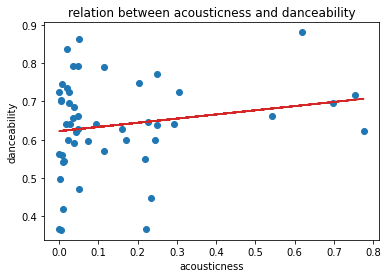

In [ ]:
plotsRelation(df_1, "acousticness", "danceability")

R^2 = 0.0937


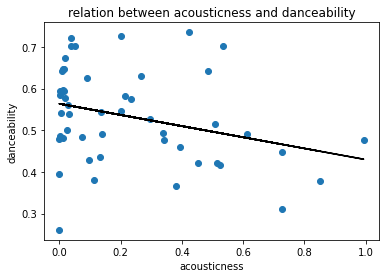

In [ ]:
plotsRelation(df_2, "acousticness", "danceability")

R^2 = 0.0218


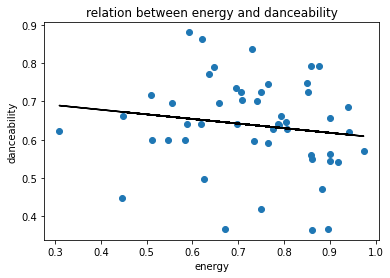

In [ ]:
plotsRelation(df_1, "energy", "danceability")

R^2 = 0.1005


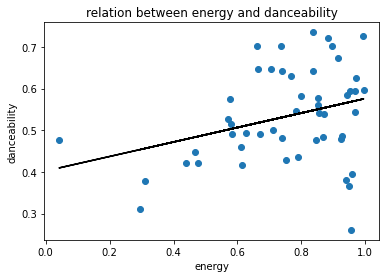

In [ ]:
plotsRelation(df_2, "energy", "danceability")

R^2 = 0.0599


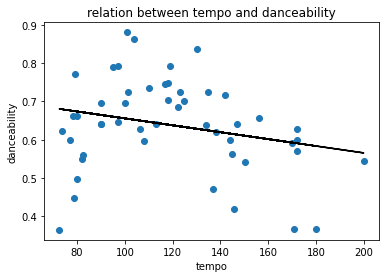

In [ ]:
plotsRelation(df_1, "tempo", "danceability")

R^2 = 0.0077


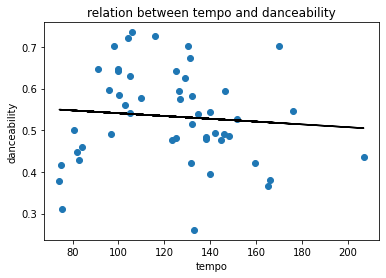

In [ ]:
plotsRelation(df_2, "tempo", "danceability")

R^2 = 0.0281


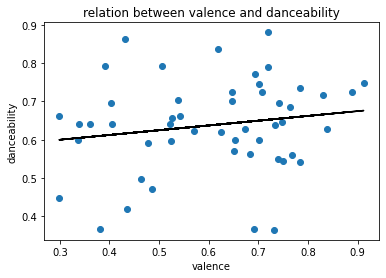

In [ ]:
plotsRelation(df_1, "valence", "danceability")

R^2 = 0.2981


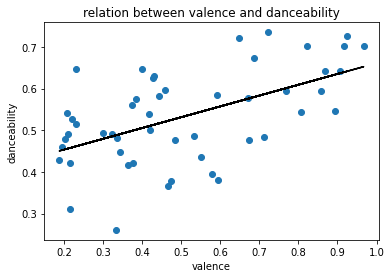

In [ ]:
plotsRelation(df_2, "valence", "danceability")

R^2 = 0.0147


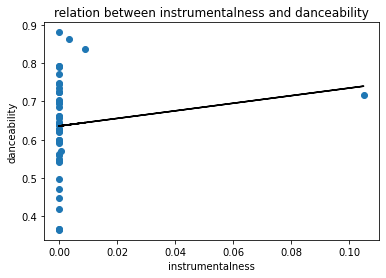

In [ ]:
plotsRelation(df_1, "instrumentalness", "danceability")

R^2 = 0.1011


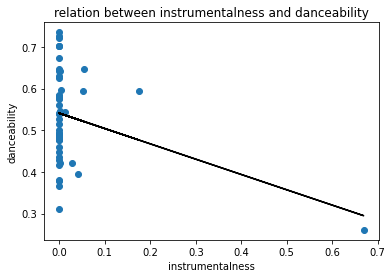

In [ ]:
plotsRelation(df_2, "instrumentalness", "danceability")

R^2 = 0.0419


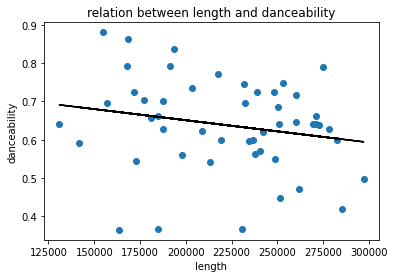

In [ ]:
plotsRelation(df_1, "length", "danceability")

R^2 = 0.0002


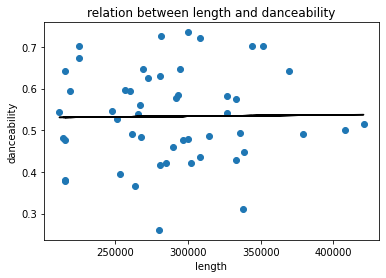

In [ ]:
plotsRelation(df_2, "length", "danceability")

In [ ]:
import statsmodels.api as sm 
import statsmodels.formula.api as smf

def multipleRefression(df, column_1, column_2):
  x = pd.get_dummies(df[[str(column_1),column_2]]) # 説明変数
  y = df['danceability'] # 目的変数

  # 定数項(y切片)を必要とする線形回帰のモデル式ならば必須
  X = sm.add_constant(x)

  # 最小二乗法でモデル化
  model = sm.OLS(y, X)
  result = model.fit()

  # 重回帰分析の結果を表示する
  result.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import plotly.express as px

fig = px.scatter_3d(df_1, x='energy', y='tempo', z='danceability',
                    color='danceability')
fig.show()

In [ ]:
from sklearn.decomposition import PCA
import plotly.express as px
import plotly.graph_objects as go

pca=PCA(n_components=2)
pca.fit(df_1['energy'], df_1['tempo'])

fig = go.Figure(
    data=[go.Scatter3d(
      x = df_1['energy'], y = df_1['tempo'], z = df_1['danceability'], 
      
      mode='markers',
      marker=dict(
          size=1,
          color= df_1['danceability'],                # set color to an array/list of desired values
          # colorscale='Viridis',   # choose a colorscale
          opacity=0.8)), 

          go.Cone(x=[pca.mean_[0]], y=[pca.mean_[1]], z=[pca.mean_[2]], 
                  u= [pca.components_[0][0]], v= [pca.components_[0][1]], w= [pca.components_[0][2]],     
               sizemode="absolute",sizeref=0.1,
           ),
])


fig.show()

ValueError: ignored

In [ ]:
x = pd.get_dummies(df_1[['length', 'acousticness', 'energy', 'tempo', 'valence', 'mode', 'popularity', 'instrumentalness', 'liveness', 'speechiness', 'time_signature']]) # 説明変数
y = df_1['danceability'] # 目的変数

# 定数項(y切片)を必要とする線形回帰のモデル式ならば必須
X = sm.add_constant(x)

# 最小二乗法でモデル化
model = sm.OLS(y, X)
result = model.fit()

# 重回帰分析の結果を表示する
result.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           danceability   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     2.005
Date:                Tue, 26 Jul 2022   Prob (F-statistic):             0.0556
Time:                        05:59:22   Log-Likelihood:                 46.319
No. Observations:                  50   AIC:                            -68.64
Df Residuals:                      38   BIC:                            -45.69
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.8800      0.573      1.536      0.133      -0.280       2.040
length           -5.647e-07   4.52e-07     -1.248      0.220   -1.48e-06    3.51e-07
acousticness         0.0293      0.115      0.254      0.801      -0.204       0.262
energy               0.0533      0.169      0.315      0.755      -0.290       0.396
tempo               -0.0004      0.001     -0.700      0.488      -0.002       0.001
valence              0.1705      0.112      1.524      0.136      -0.056       0.397
mode                -0.0850      0.040     -2.116      0.041      -0.166      -0.004
popularity           0.0024      0.002      1.125      0.267      -0.002       0.007
instrumentalness     0.9202      1.237      0.744      0.462      -1.585       3.425
liveness            -0.3538      0.159     -2.224      0.032      -0.676      -0.032
speechiness         -0.6561      0.340     -1.930      0.061      -1.344       0.032
time_signature      -0.0500      0.118     -0.422      0.675      -0.290       0.190
==============================================================================
Omnibus:                        4.015   Durbin-Watson:                   1.706
Prob(Omnibus):                  0.134   Jarque-Bera (JB):                2.920
Skew:                          -0.522   Prob(JB):                        0.232
Kurtosis:                       3.557   Cond. No.                     1.80e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
x = pd.get_dummies(df_2[['length', 'acousticness', 'energy', 'tempo', 'valence', 'mode', 'popularity', 'instrumentalness', 'liveness', 'speechiness', 'time_signature']]) # 説明変数
y = df_2['danceability'] # 目的変数

# 定数項(y切片)を必要とする線形回帰のモデル式ならば必須
X = sm.add_constant(x)

# 最小二乗法でモデル化
model = sm.OLS(y, X)
result = model.fit()

# 重回帰分析の結果を表示する
result.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           danceability   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     6.831
Date:                Tue, 26 Jul 2022   Prob (F-statistic):           3.50e-06
Time:                        06:02:06   Log-Likelihood:                 66.074
No. Observations:                  50   AIC:                            -108.1
Df Residuals:                      38   BIC:                            -85.20
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.8369      0.207      4.044      0.000       0.418       1.256
length            4.128e-07    2.3e-07      1.793      0.081   -5.32e-08    8.79e-07
acousticness        -0.2288      0.068     -3.374      0.002      -0.366      -0.091
energy              -0.0562      0.091     -0.619      0.540      -0.240       0.128
tempo               -0.0012      0.000     -2.784      0.008      -0.002      -0.000
valence              0.2481      0.056      4.393      0.000       0.134       0.362
mode                -0.0419      0.029     -1.466      0.151      -0.100       0.016
popularity           0.0013      0.001      1.496      0.143      -0.000       0.003
instrumentalness    -0.4538      0.119     -3.810      0.000      -0.695      -0.213
liveness            -0.1609      0.108     -1.486      0.145      -0.380       0.058
speechiness          0.2540      0.353      0.720      0.476      -0.460       0.968
time_signature      -0.0770      0.040     -1.907      0.064      -0.159       0.005
==============================================================================
Omnibus:                        5.128   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.077   Jarque-Bera (JB):                2.061
Skew:                          -0.043   Prob(JB):                        0.357
Kurtosis:                       2.009   Cond. No.                     9.87e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.87e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
from sklearn.decomposition import PCA
import plotly.express as px
import plotly.graph_objects as go


pca=PCA(n_components=2)
pca.fit(df_1_1, df_2_2)

fig = go.Figure(
    data=[go.Scatter3d(
      x = df_1['energy'], y = df_1['tempo'], z = df_1['danceability'], 
      
      mode='markers',
      marker=dict(
          size=0,
          color= df_1_1['danceability'],               # set color to an array/list of desired values
          # colorscale='Viridis',   # choose a colorscale
          opacity=0.8)), 

          go.Cone(x=[pca.mean_[0]], y=[pca.mean_[1]], z=[pca.mean_[2]], 
                  u= [pca.components_[0][0]], v= [pca.components_[0][1]], w= [pca.components_[0][2]],     
               sizemode="absolute",sizeref=0.1,
           ),
])


fig.show()

In [ ]:
df_1

,name,album,artist,release_date,length,mode,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,valence
0,ダンスホール,ダンスホール,Mrs. GREEN APPLE,2022-05-23,203149,1,74,0.736,0.020900,0.695,0.000000,0.0517,-3.870,0.0468,109.976,4,0.784
1,エジソン,ネオン,WEDNESDAY CAMPANELLA,2022-05-25,193510,0,71,0.838,0.019500,0.729,0.008900,0.1010,-5.733,0.0802,129.999,4,0.619
2,バニラ,バニラ,Kyanai,2022-03-09,251050,1,71,0.641,0.028000,0.698,0.000000,0.1300,-3.934,0.0307,113.041,4,0.521
3,POP!,IM NAYEON,NAYEON,2022-06-24,168106,1,73,0.793,0.035600,0.859,0.000000,0.0343,-2.998,0.0544,97.001,4,0.392
4,逆光 - ウタ from ONE PIECE FILM RED,逆光 (ウタ from ONE PIECE FILM RED),Ado,2022-07-05,237862,0,68,0.563,0.000382,0.901,0.000005,0.3880,-3.926,0.1100,145.004,4,0.684
5,Girls,Girls - The 2nd Mini Album,aespa,2022-07-08,240440,0,81,0.570,0.115000,0.974,0.000594,0.1250,-0.173,0.3250,171.958,4,0.650
6,MASCARA,MASCARA,XG,2022-06-29,191439,0,76,0.794,0.048200,0.877,0.000002,0.2410,-3.608,0.0827,119.013,4,0.506
7,ピアス,ピアス,クボタカイ,2022-07-06,236753,1,64,0.599,0.021300,0.583,0.000009,0.0584,-8.205,0.0812,77.053,4,0.702
8,Left and Right (Feat. Jung Kook of BTS),Left and Right (Feat. Jung Kook of BTS),Charlie Puth,2022-06-24,154486,1,95,0.881,0.619000,0.592,0.000013,0.0901,-4.898,0.0324,101.058,4,0.719
9,堕天,堕天,Creepy Nuts,2022-07-08,172948,1,70,0.543,0.011800,0.901,0.000000,0.3250,-4.800,0.2190,199.892,4,0.750
